# This is an example

## Prepareration

In [412]:
import PIL
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Load File

In [413]:
image_original = Image.open("test.gif")

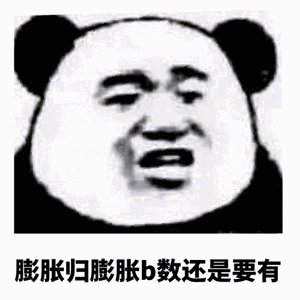

In [414]:
image_original.save("test.gif.png")
image_original

In [415]:
image_original_width, image_original_height = image_original.size
print(image_original_width, image_original_height)

300 300


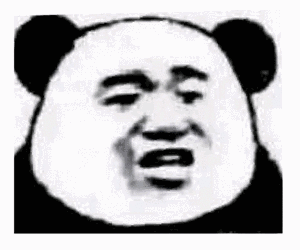

In [416]:
cropped_image = image.crop((0,0,300,250))
cropped_image

In [417]:
cropped_image.save("test.gif.png")

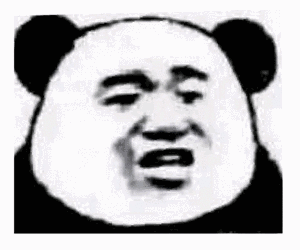

In [418]:
image_png = Image.open("test.gif.png")
image_png

In [419]:
image_png_cv = cv2.imread("test.gif.png")

In [420]:
gray = cv2.cvtColor(image_png_cv, cv2.COLOR_BGR2GRAY)

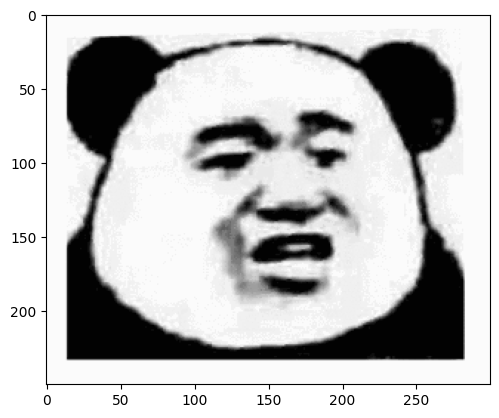

In [421]:
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)

In [450]:
MATRIX_SIZE = 13
blurred = cv2.GaussianBlur(gray, (MATRIX_SIZE, MATRIX_SIZE), 0)

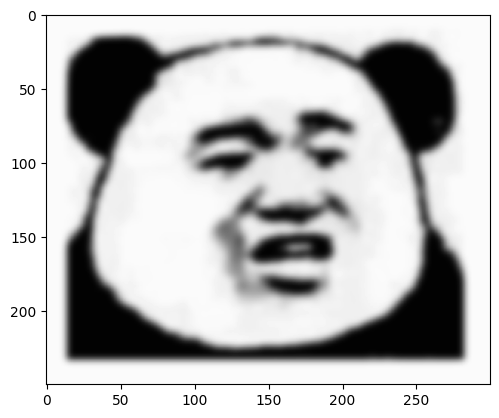

In [451]:
plt.imshow(blurred, cmap='gray', vmin=0, vmax=255)

In [452]:
edges = cv2.Canny(blurred, 0, 70)
edges

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

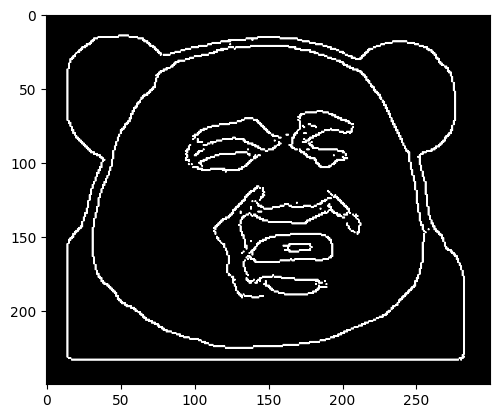

In [453]:
plt.imshow(edges, cmap='gray', vmin=0, vmax=100)

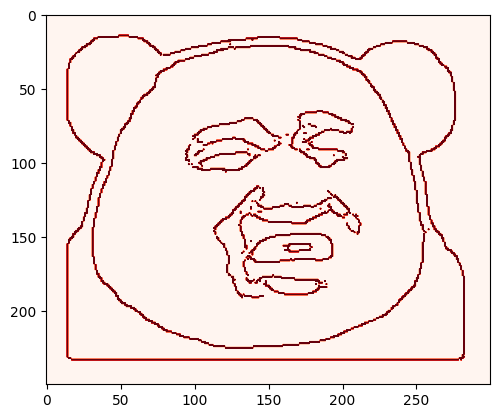

In [454]:
plt.imshow(edges, cmap='Reds', vmin=0, vmax=100)

In [455]:
edges_inverse = cv2.bitwise_not(edges)

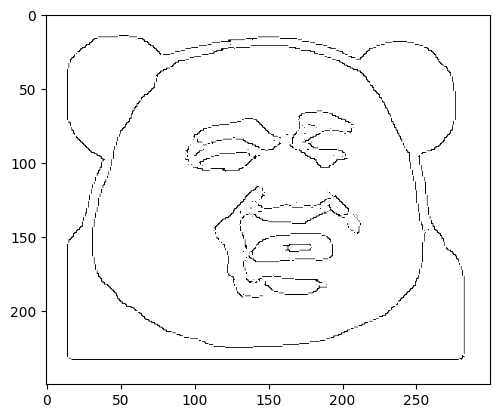

In [456]:
plt.imshow(edges_inverse, cmap='gray', vmin=0, vmax=100)

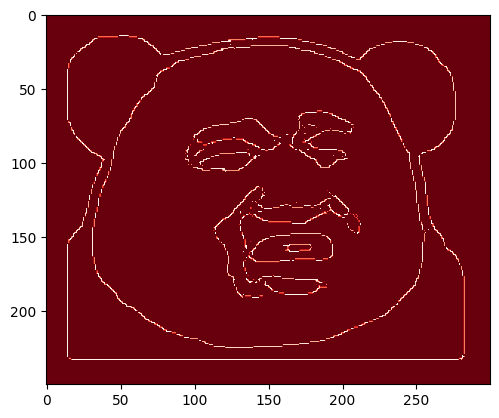

In [457]:
plt.imshow(edges_inverse, cmap='Reds', vmin=0, vmax=100)

In [458]:
image_test = image_png_cv.copy()

In [459]:
for i in range(image_test.shape[0]):
    for j in range(image_test.shape[1]):
        if edges_inverse[i][j] == 0:
            image_test[i][j] = [255, 0, 0]

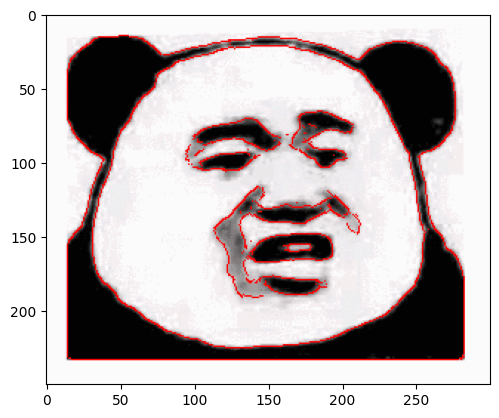

In [460]:
plt.imshow(image_test)

## Font to Image (Test)

In [502]:
import PIL
from PIL import ImageFont, Image, ImageDraw

In [503]:
text = "Just a test!"
font_file = "test_font.ttf"
font_size = 36

In [504]:
font_image_width = 400
font_image_height = 200
background_color = (255,255,255)

In [505]:
font_image = Image.new("RGB", (font_image_width, font_image_height), background_color)
draw = ImageDraw.Draw(font_image)

In [506]:
font_font = ImageFont.truetype(font_file, font_size)

In [507]:
font_text_width, font_text_height = draw.textsize(text, font=font_font)
font_text_position = ((font_image_width - font_text_width) // 2, (font_image_height - font_text_height) // 2)

In [508]:
font_text_color = (0,0,0)

In [509]:
draw.text(font_text_position, text, font=font_font, fill=font_text_color)

In [510]:
font_image.save("test_font.png")

### Show all characters in the font(test)

In [513]:
font_file = "test_font.ttf"
font_size = 36 
font_font = ImageFont.truetype(font_file, font_size)

In [514]:
font_image_width = 1000
font_image_height = 1000
font_background_color = (255,255,255)
font_image = Image.new("RGB", (font_image_width, font_image_height), font_background_color)
font_draw = ImageDraw.Draw(font_image)

In [515]:
font_x = 0
font_y = 0

In [518]:
for font_char_code in range(0x0000, 0xFFFF + 1):
    font_char = chr(font_char_code)

    font_char_width, font_char_height = draw.textsize(font_char, font=font_font)

    if font_x + font_char_width > font_image_width:
        font_x = 0
        font_y += font_char_height

    draw.text((font_x, font_y), font_char, font=font_font, fill=(0,0,0))

    font_x += font_char_width

In [520]:
font_image.save("test_font_all.png")

## Related interesting part (characterized graph)

In [511]:
ascii_char = list("$@B%8&WM#*oahkbdpqwmZO0QLCJUYXzcvunxrjft/\|()1{}[]?-_+~<>i!lI;:,\"^`'.  ")

def get_char_from_pixel(r,g,b,alpha = 256):
    if alpha == 0:
        return ' '
    length = len(ascii_char)
    gray = int(0.2126 * r + 0.7152 * g + 0.0722 * b)

    unit = (256.0 + 1)/length
    return ascii_char[int(gray/unit)]

# 使用PIL库对图片进行转换
def ascii_pic_from_pil(path):
    text = ""

    im = Image.open(path)
    WIDTH, HEIGHT = im.shape[:2]
    WIDTH = int(WIDTH / 2)
    HEIGHT = int(HEIGHT / 2)
    im = im.resize((WIDTH, HEIGHT), Image.NEAREST)

    for h in range(im.size[1]):     # 图片像素纵坐标
        for w in range(im.size[0]): # 图片像素横坐标
            text += get_char_from_pixel(*im.getpixel((w, h)))
        text += '\n'

    return text

def save_to_file(filename, pic_str):
    with open(filename, 'w') as f:
        f.write(pic_str)

def ascii_pic_from_cv(path):
    text = ""
    img = cv2.imread(path)
    WIDTH, HEIGHT = img.shape[:2]
    WIDTH = int(WIDTH / 2)
    HEIGHT = int(HEIGHT / 2)
    img = cv2.resize(img, (WIDTH, HEIGHT))

    for h in range(HEIGHT):        # 图片像素纵坐标
        for w in range(WIDTH):    # 图片像素横坐标
            b, g, r = img[h,w]
            text += get_char_from_pixel(r,g,b)
        text += '\n'

    return text



In [512]:
img = ascii_pic_from_cv('test.gif.png')
save_to_file('cv.txt', img)